<h1>【행정안전부】 2022년 데이터 분석 활용 공모전

<h3>서울시 우리마을가게 상권분석을 하기위해 2019년, 2020년, 2021년의 데이터를 분석합니다. 






*  "서울시 우리마을가게 상권분석서비스(상권-추정매출)" 데이터 다운로드 링크
  - https://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do 
  - 위 링크에서 "파일내려받기" $\rightarrow$ "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.zip", "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.zip", "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.zip"을 다운로드 받습니다.


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

plt.rcParams["font.family"] = 'NanumGodic'
plt.rcParams["figure.figsize"] = (10,10)

os.chdir("/content/drive/MyDrive/Colab Notebooks/")
addr = "전국 행정구역/ctp_rvn.shp"
geo_data = gpd.read_file(addr)
geo_data.length

0     1.890338e+05
1     4.578478e+05
2     2.152391e+05
3     1.129739e+06
4     1.408953e+05
5     1.580056e+05
6     2.688995e+05
7     1.494989e+05
8     1.900657e+06
9     1.577561e+06
10    7.957023e+05
11    1.591102e+06
12    1.104374e+06
13    6.581468e+06
14    1.324848e+06
15    2.749527e+06
16    4.558080e+05
dtype: float64

In [37]:
geo_data

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."
5,30,Daejeon,´ëÀü±¤¿ª½Ã,"POLYGON ((990946.725 1832389.260, 991057.692 1..."
6,31,Ulsan,¿ï»ê±¤¿ª½Ã,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,¼¼Á¾Æ¯º°ÀÚÄ¡½Ã,"POLYGON ((971235.936 1844386.985, 971234.055 1..."
8,41,Gyeonggi-do,°æ±âµµ,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,42,Gangwon-do,°­¿øµµ,"MULTIPOLYGON (((1163759.191 1909653.101, 11637..."


In [38]:
geo_data.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


In [39]:
plt.rcParams['figure.figsize']=(10,20)

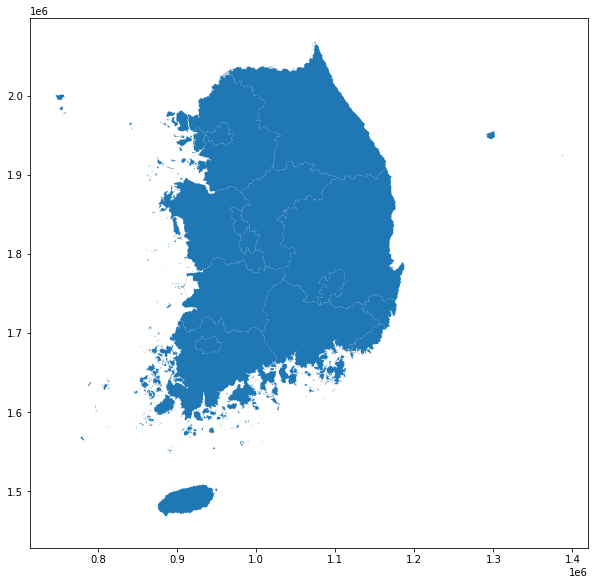

In [40]:
geo_data.plot()
plt.show()

In [41]:
seo = geo_data[geo_data['CTP_ENG_NM'] == "Seoul"]
seo

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."


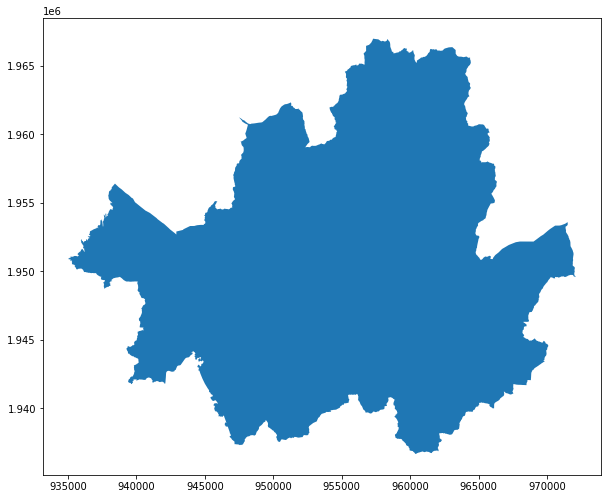

In [42]:
seo.plot()